# Support Vector Regression Model

### Import libraries

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Importing dataset 

In [55]:
# import csv 
data=pd.read_csv("Position_Salaries.csv")

# creating matrix of feature and dependent variable vector
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [56]:
# printing matrix of feature 
pd.DataFrame(x)

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [57]:
pd.DataFrame(y)

,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


### Feature scaling on Y(Dependent variable vector)

In [58]:
# we are going to apply standarization
# StandardFeature takes 2d array as the input so convet 1D array to 2D array 
pd.DataFrame(y)

,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [59]:
y=y.reshape(len(y),1)

In [60]:
# import standardFeture from sklearn
from sklearn.preprocessing import StandardScaler
# as data is different it has difference variance and all so apply different scalar on 
# different object
sc1=StandardScaler()
x=sc1.fit_transform(x)

sc2=StandardScaler()
y=sc2.fit_transform(y)

In [61]:
print(x,"\n\n",y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training SVR model

In [62]:
from sklearn.svm import SVR
model=SVR(kernel="rbf")

# now feed data to model
model.fit(x,y)

/home/ghansham/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## predicting output with model

In [96]:
# predict y value 
m=model.predict(x)

# get inverse transform on standardfeature object for y 
PredVal=sc2.inverse_transform(m.reshape(-1,1))
# predicted values
np.set_printoptions(precision=2)
PredVal

array([[ 73474.16],
       [ 70786.95],
       [ 88213.01],
       [108254.99],
       [122574.52],
       [145503.11],
       [209410.23],
       [330606.89],
       [471671.96],
       [557821.76]])

### visualizing results

In [98]:
# inverse transformed x and y 
xInverse=sc1.inverse_transform(x)
yInverse=sc2.inverse_transform(y)

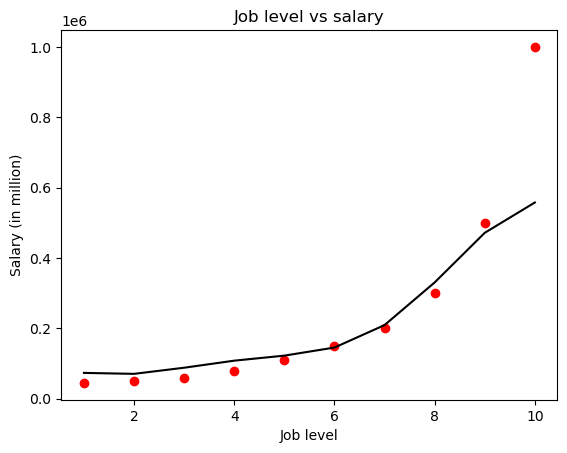

In [101]:
plt.scatter(xInverse,yInverse,color="red")
plt.title("Job level vs salary")
plt.xlabel("Job level")
plt.ylabel("Salary (in million)")

# draw curve for svr
plt.plot(xInverse,PredVal,color="black")
# plt.savefig("SVROutput")
plt.show()